<a href="https://colab.research.google.com/github/paul6598/AI_practice/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D

# 데이터 로드

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


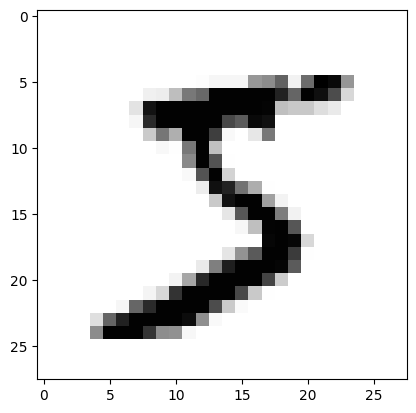

In [5]:
plt.imshow(x_train[0], cmap="Greys")
plt.show()

# 데이터 전처리

In [6]:
 #(60000, 28, 28), 데이터 갯수, 세로 픽셀, 가로 픽셀

x_train = x_train.reshape(x_train.shape[0],784) #데이터를 1차원 배열로 변형
x_train = x_train.astype('float64') #0~255 사이의 정수값을 갖는 픽셀 데이터를 실수 자료형으로 변환(연산을 하기 위해)
x_train = x_train/255 #학습을 위해 0~255 사이의 값을 0~1 사이의 값으로 바꿈(적절한 분산을 갖도록)

x_test = x_test.reshape(x_test.shape[0],28*28).astype('float64')/255  #위 과정을 한번에

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#0~9 사이의 정수값을 갖는 y 레이블을 [0,1,0,0,0,0,0,0,0] 의 형식과 같이 원핫인코딩 해줌
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 딥러닝 기본 프레임

1. 신경층 구성, 층층이 쌓아올리면서 해당층 노드의 갯수, 활성화 함수등을 결정

2. 구성한 신경층을 컴파일, 여기선 각 신경층에서의 손실함수, 최적화함수, 성능지표들을 parameter로 받음

3. 학습 진행중 학습이 충분히 완료되었다고 판단했을때(학습률이 더이상 증가하지 않을때) 과적합을 방지하기 위해 학습을 중단하고, 가장 좋았던 모델을 저장


In [75]:
model = Sequential()
model.add(Dense(512, input_dim = 784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [76]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [77]:
modelpath = './MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [78]:
history = model.fit(x_train, y_train, validation_split=0.25,
                    epochs = 30, batch_size=200, verbose=0,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18108, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18108 to 0.13507, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13507 to 0.11180, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11180 to 0.09625, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09625 to 0.09132, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09132 to 0.08716, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08716 to 0.08265, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08265

Epoch 9: val_loss did not improve from 0.08265

Epoch 10: val_loss improved from 0.08265 to 0.07970, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss improved from 0.07970 to 0.07919, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.07919

Epoch 13: val_loss did not improve from 0.07919

Epoch 14: val_loss did not improve from 0.07919

Epoch 15: val_loss did not improve from 0.07919

Epoch 16: val_los

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))
model2.add(Conv2D(64,(3,3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [11]:
model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

modelpath = './MNIST_MLP.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model2.fit(x_train, y_train, validation_split=0.25,
                    epochs = 50, batch_size=200, verbose=1,
                    callbacks = [early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model2.evaluate(x_test, y_test)[1]))

Epoch 1/50
221/225 [============================>.] - ETA: 0s - loss: 0.2490 - accuracy: 0.9261
Epoch 1: val_loss improved from inf to 0.07599, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 10s 17ms/step - loss: 0.2458 - accuracy: 0.9271 - val_loss: 0.0760 - val_accuracy: 0.9770
Epoch 2/50
  1/225 [..............................] - ETA: 3s - loss: 0.0649 - accuracy: 0.9800

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


224/225 [============================>.] - ETA: 0s - loss: 0.0629 - accuracy: 0.9808
Epoch 2: val_loss improved from 0.07599 to 0.05636, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 3s 14ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0564 - val_accuracy: 0.9817
Epoch 3/50
224/225 [============================>.] - ETA: 0s - loss: 0.0431 - accuracy: 0.9867
Epoch 3: val_loss improved from 0.05636 to 0.04250, saving model to ./MNIST_MLP.hdf5
225/225 [==============================] - 3s 13ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0425 - val_accuracy: 0.9872
Epoch 4/50
222/225 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9904
Epoch 4: val_loss did not improve from 0.04250
225/225 [==============================] - 3s 13ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 5/50
223/225 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9927
Epoch 5: val_l

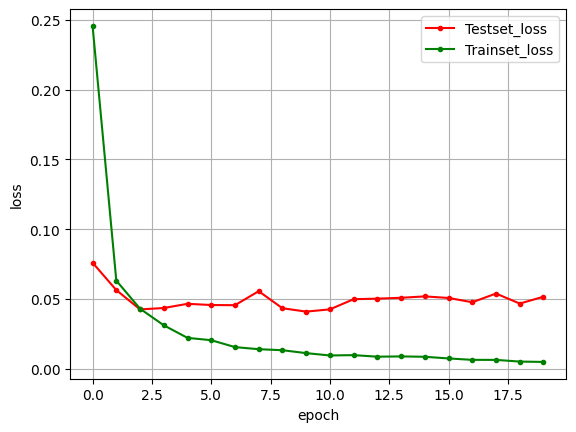

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'green', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

True